In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


Data Extraction and Loading

In [3]:
# Set the display options
pd.options.display.float_format = '{:.2f}'.format


In [4]:
# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

In [5]:
# Fetch data from yfinance
data = yf.download(tickers, start=start_date, end=end_date)


[*********************100%***********************]  3 of 3 completed


In [6]:
# Display the first few rows of the data
print(data.head())

Price                     Adj Close              Close               High  \
Ticker                          BND    SPY  TSLA   BND    SPY  TSLA   BND   
Date                                                                        
2015-01-02 00:00:00+00:00     63.36 173.17 14.62 82.65 205.43 14.62 82.69   
2015-01-05 00:00:00+00:00     63.54 170.05 14.01 82.89 201.72 14.01 82.92   
2015-01-06 00:00:00+00:00     63.73 168.44 14.09 83.13 199.82 14.09 83.38   
2015-01-07 00:00:00+00:00     63.77 170.54 14.06 83.18 202.31 14.06 83.28   
2015-01-08 00:00:00+00:00     63.67 173.57 14.04 83.05 205.90 14.04 83.11   

Price                                    Low               Open               \
Ticker                       SPY  TSLA   BND    SPY  TSLA   BND    SPY  TSLA   
Date                                                                           
2015-01-02 00:00:00+00:00 206.88 14.88 82.42 204.18 14.22 82.43 206.38 14.86   
2015-01-05 00:00:00+00:00 204.37 14.43 82.70 201.35 13.81 82.74

Data Cleaning and Basic Analysis

In [7]:
# Check for missing values and data types
print(data.isnull().sum())
print(data.dtypes)

Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64
Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY         int64
           TSLA        int64
dtype: object


In [8]:
# Forward fill missing values
data = data.ffill().bfill()

In [9]:
# Extract the 'Close' prices for analysis
close_prices = data['Adj Close']

In [10]:
# Normalize the data (optional)
normalized_data = (close_prices - close_prices.mean()) / close_prices.std()


In [11]:
# Save cleaned data to CSV
data.to_csv('financial_data_cleaned.csv')

Exploratory Data Analysis (EDA)


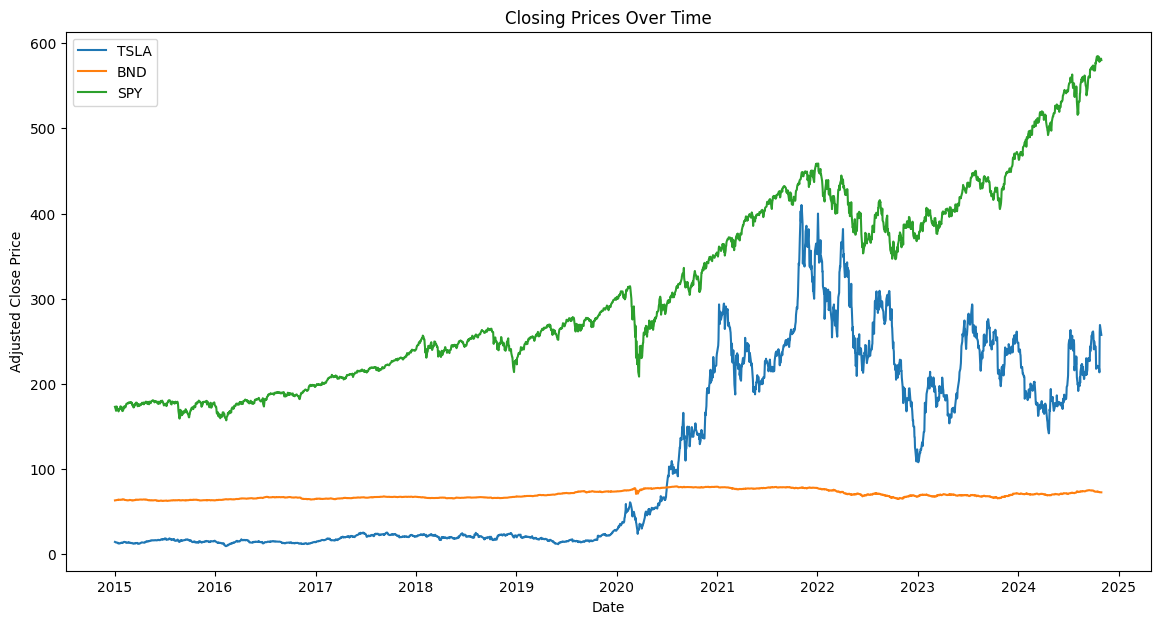

In [12]:
# Plot closing prices over time
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(close_prices.index, close_prices[ticker], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

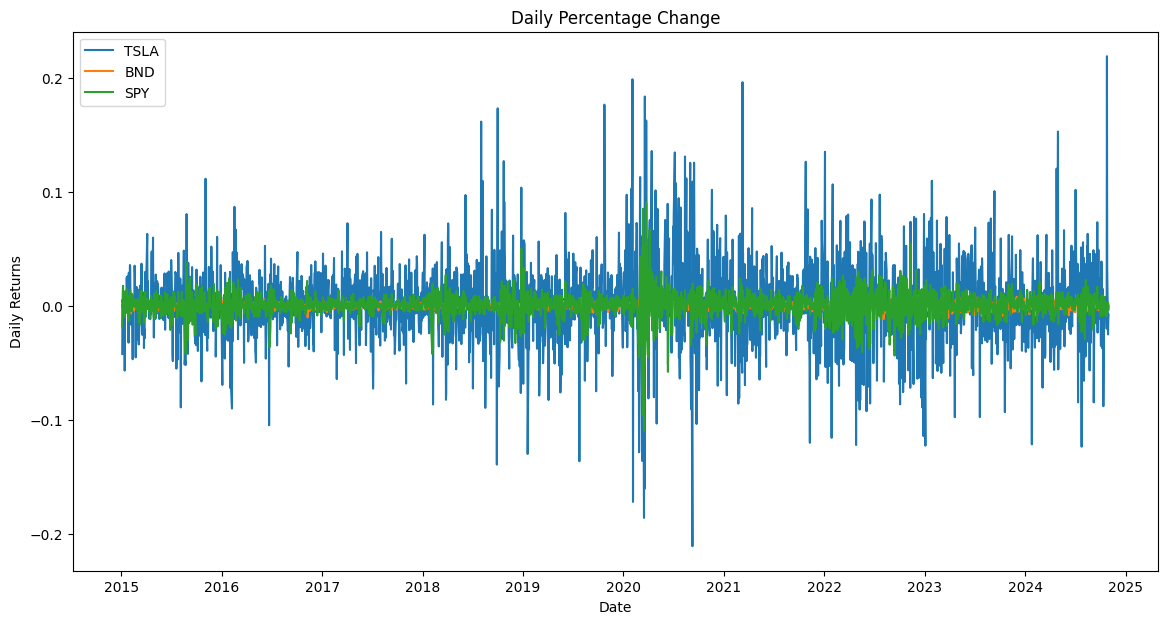

In [13]:
# Calculate and plot daily percentage change
daily_returns = close_prices.pct_change().dropna()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)
plt.title('Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

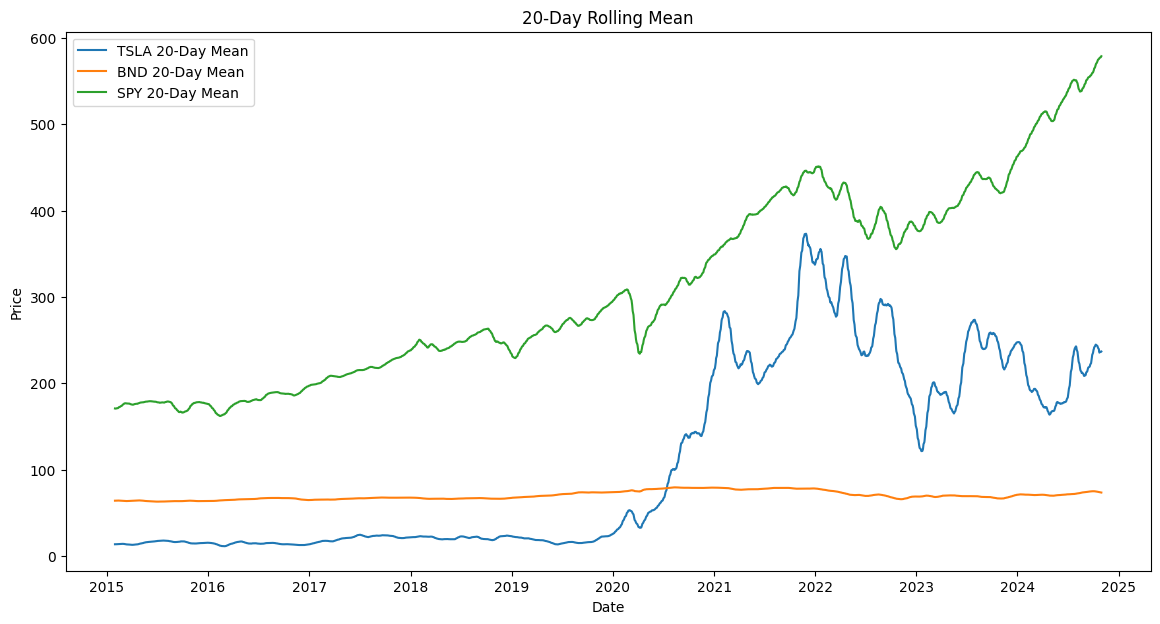

In [14]:
# Rolling analysis (e.g., 20-day rolling mean and standard deviation)
rolling_mean = close_prices.rolling(window=20).mean()
rolling_std = close_prices.rolling(window=20).std()


plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_mean.index, rolling_mean[ticker], label=f'{ticker} 20-Day Mean')
plt.title('20-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()